In [32]:
# Import libraries and api keys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from citipy import citipy

# API key for openweathermaps
from api_keys import weather_api_key

In [2]:
# Generate a list of cities by randomly arranging longitude and latitudes

# Empty lists
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Pull 1500 random samples of lat and lng
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Translate lat and lngs to cities
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # Keep only if city name is unique
    if city not in cities:
        cities.append(city)

# Print count and city names
print(len(cities))
print(cities)

616
['arraial do cabo', 'guerrero negro', 'sovetsk', 'taiohae', 'vingt cinq', "nuku'alofa", 'margaret river', 'berdigestyakh', 'bredasdorp', 'belmonte', 'stanley', "'ohonua", 'adamstown', 'kamyshin', 'jamestown', 'katsuura', 'tiksi', 'ribeira grande', 'port mathurin', 'ilulissat', 'ushuaia', 'invercargill', 'grytviken', 'barabai', 'anabar', 'isafjordur', 'chonchi', 'vorgashor', 'nadym', 'petropavlovsk-kamchatsky', 'gejiu', 'huanggang', 'port-aux-francais', 'lebu', 'cargados carajos', 'kurkino', 'tranovaho', 'san patricio', 'gorontalo', 'freetown', 'bethel', 'bamboo flat', 'mo i rana', 'kodiak', 'afif', 'hami', 'puerto del rosario', 'udomlya', 'ponta delgada', 'puerto natales', 'mount isa', 'pisco', 'tsiombe', 'magadan', 'port alfred', 'santana', 'camrose', 'turpan', 'ust-nera', 'fuvahmulah', "ust'-ordynskiy", 'saldanha', 'west island', 'chhatarpur', 'nagqu', 'al jawf', 'carahue', 'rio grande', 'balikpapan', 'tamanrasset', 'montereau-fault-yonne', 'barra de santo antonio', 'khalkhal', '

In [4]:
# Compile weather data using OpenWeatherMap api

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Initialize city data list
city_data = []

# counters
record_count = 0

# Loop through all cities
for city in cities:

    # Build url to send request
    city_url = url + "&q=" + city

    # For each of the cities
    try:
        # Send request
        city_weather = requests.get(city_url).json()

        # Receive data from api
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Increment record count and print city name and record count
        record_count += 1
        print(f"We've got another one! That's {record_count} | {city}")

        # Append data to list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # Error handling
    except:
        print("City not found. Skipping...")
              
print("Done!")

We've got another one! That's 1 | arraial do cabo
We've got another one! That's 2 | guerrero negro
We've got another one! That's 3 | sovetsk
City not found. Skipping...
City not found. Skipping...
We've got another one! That's 4 | nuku'alofa
We've got another one! That's 5 | margaret river
We've got another one! That's 6 | berdigestyakh
We've got another one! That's 7 | bredasdorp
We've got another one! That's 8 | belmonte
We've got another one! That's 9 | stanley
City not found. Skipping...
We've got another one! That's 10 | adamstown
We've got another one! That's 11 | kamyshin
We've got another one! That's 12 | jamestown
We've got another one! That's 13 | katsuura
We've got another one! That's 14 | tiksi
We've got another one! That's 15 | ribeira grande
We've got another one! That's 16 | port mathurin
We've got another one! That's 17 | ilulissat
We've got another one! That's 18 | ushuaia
We've got another one! That's 19 | invercargill
We've got another one! That's 20 | grytviken
We'v

In [5]:
# Convert to dataframe
city_data_df = pd.DataFrame(city_data)

print(city_data_df.count())

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64


In [6]:
# Top five
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,26.27,85,97,8.01,BR,1707866198
1,guerrero negro,27.9769,-114.0611,17.99,38,0,5.35,MX,1707866198
2,sovetsk,55.0839,21.8785,3.10,82,100,2.23,RU,1707866199
3,nuku'alofa,-21.1333,-175.2000,30.19,79,75,8.23,TO,1707866199
4,margaret river,-33.9500,115.0667,13.28,78,65,4.89,AU,1707866199


In [7]:
# Export to tabele to csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read data csv back in
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display head
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,26.27,85,97,8.01,BR,1707866198
1,guerrero negro,27.9769,-114.0611,17.99,38,0,5.35,MX,1707866198
2,sovetsk,55.0839,21.8785,3.10,82,100,2.23,RU,1707866199
3,nuku'alofa,-21.1333,-175.2000,30.19,79,75,8.23,TO,1707866199
4,margaret river,-33.9500,115.0667,13.28,78,65,4.89,AU,1707866199


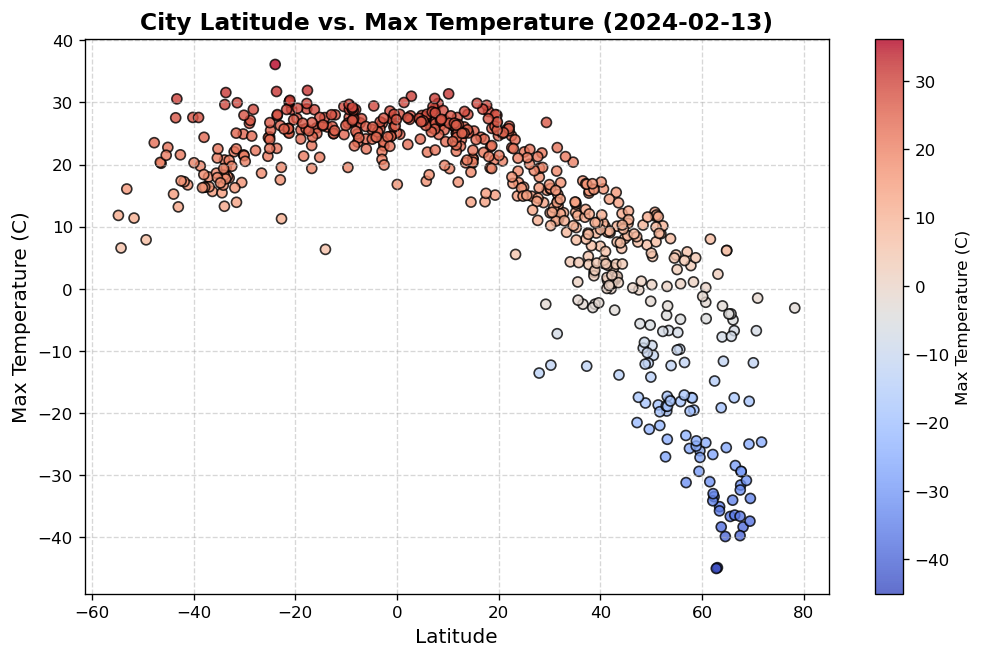

In [27]:
# create scatter plot for latitude vs temperature
plt.figure(figsize=(10, 6), dpi=120) 
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Max Temp"],
    edgecolor="black", 
    linewidths=1, 
    marker="o",
    alpha=0.8,
    c=city_data_df["Max Temp"],  # Color code points by Max Temperature
    cmap='coolwarm'
)

# title and labels formatting
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%Y-%m-%d"), fontsize=14, fontweight='bold')
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (C)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Max Temperature (C)')

# Saving and showing the plot
plt.savefig("Temp_vs_Lat.png", bbox_inches='tight')
plt.show()


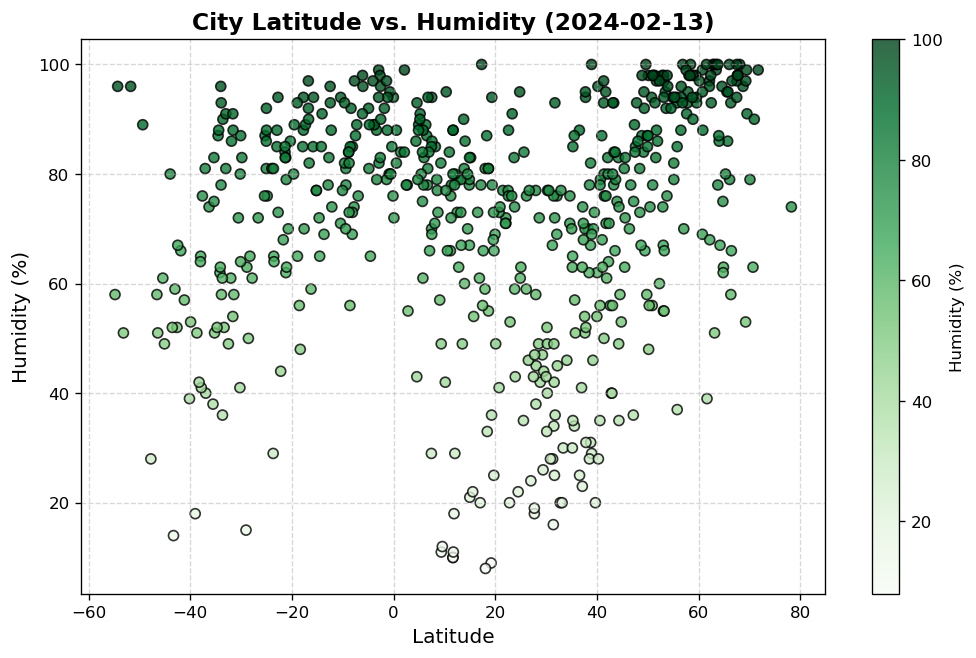

In [24]:
# create scatter plot for latitude vs humidity

plt.figure(figsize=(10, 6), dpi=120)
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Humidity"],
    edgecolor="black", 
    linewidths=1, 
    marker="o",  
    alpha=0.8, 
    c=city_data_df["Humidity"],  # Color code points by Humidity
    cmap='Greens' 
)

# chart labels titles and grid formatting
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"), fontsize=14, fontweight='bold')
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Humidity (%)')

# Saving and showing the plot
plt.savefig("Humidity_vs_Lat.png", bbox_inches='tight')
plt.show()

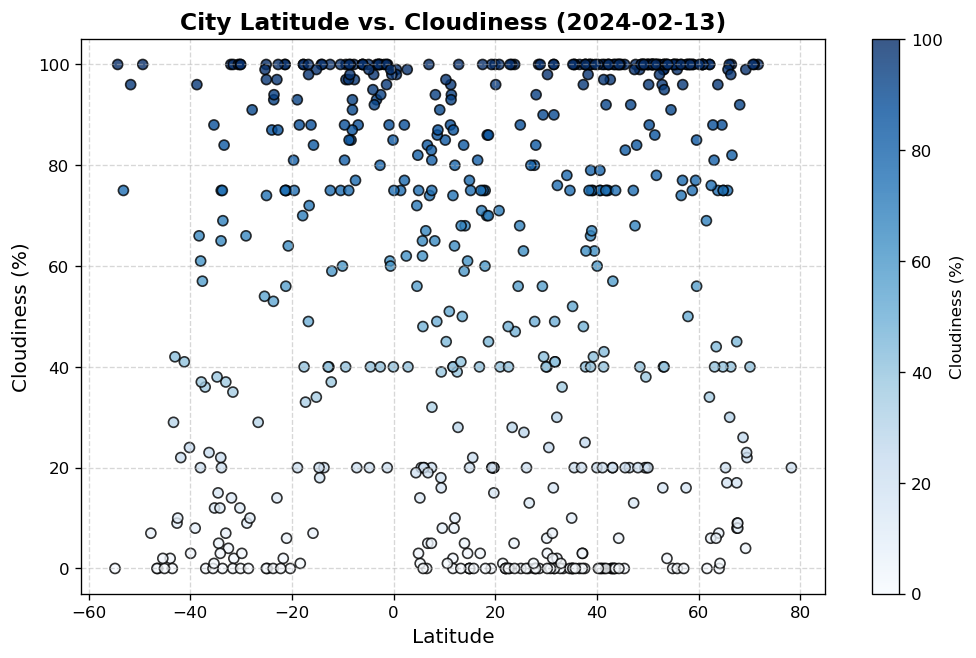

In [25]:
# create scatter plot for latitude vs cloudiness
plt.figure(figsize=(10, 6), dpi=120)
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Cloudiness"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8, 
    c=city_data_df["Cloudiness"],  # Color code points by Cloudiness
    cmap='Blues'
)
# Title , labels and grid formatting
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"), fontsize=14, fontweight='bold')
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Cloudiness (%)') 

# Saving and showing the plot
plt.savefig("Cloudiness_vs_Lat.png", bbox_inches='tight')
plt.show()

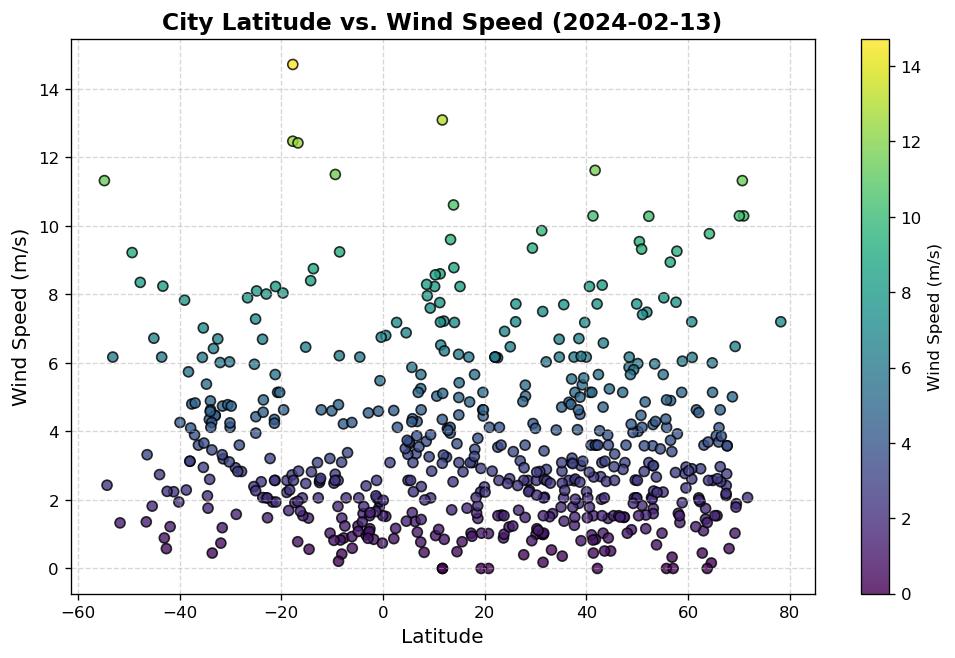

In [26]:
# create scatter plot for latitude vs wind speed

plt.figure(figsize=(10, 6), dpi=120)
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o",
    alpha=0.8,
    c=city_data_df["Wind Speed"],  # Color code points by Wind Speed
    cmap='viridis'
)

# Title lablea and grid formatting
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"), fontsize=14, fontweight='bold')
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.xlabel("Latitude", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(label='Wind Speed (m/s)')

# Saving and showing the plot
plt.savefig("Windspeed_vs_Lat.png", bbox_inches='tight')
plt.show()

In [65]:
# Regression analysis for each of the pairs above.

# Define a function for linear regression
def plot_linear_regression(x_values, y_values, title):
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot configuration
    plt.scatter(x_values, y_values, edgecolor="black", linewidths=1, marker="o", alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel('Latitude', fontsize=12)
    plt.ylabel('Max Temperature (C)', fontsize=12)

    # Position for annotations
    x_text = x_values.min() + (x_values.max() - x_values.min()) * 0.05
    y_text_line_eq = y_values.min() + (y_values.max() - y_values.min()) * 0.05
    y_text_r_value = y_text_line_eq + (y_values.max() - y_values.min()) * 0.05

    plt.annotate(line_eq, (x_text, y_text_line_eq), fontsize=12, color="red", fontweight='bold')
    plt.annotate(f'R\u00b2 = {rvalue**2:.2f}', (x_text, y_text_r_value), fontsize=12, color="red", fontweight='bold')
    
    # Print r-squared value and r value
    print(f"The r-squared value is: {rvalue**2}")
    print(f"The r value is: {rvalue}")

    plt.show()


In [34]:
# Create Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0),:]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,guerrero negro,27.9769,-114.0611,17.99,38,0,5.35,MX,1707866198
2,sovetsk,55.0839,21.8785,3.10,82,100,2.23,RU,1707866199
5,berdigestyakh,62.0989,126.6992,-26.67,97,100,2.06,RU,1707866200
8,stanley,54.8680,-1.6985,5.44,94,0,1.03,GB,1707866200
10,kamyshin,50.0983,45.4160,0.66,98,100,5.98,RU,1707866201


In [35]:
# Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0),:]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,26.27,85,97,8.01,BR,1707866198
3,nuku'alofa,-21.1333,-175.2000,30.19,79,75,8.23,TO,1707866199
4,margaret river,-33.9500,115.0667,13.28,78,65,4.89,AU,1707866199
6,bredasdorp,-34.5322,20.0403,17.63,87,15,2.12,ZA,1707866200
7,belmonte,-15.8631,-38.8828,25.88,85,7,2.06,BR,1707866200


The r-squared value is: 0.725969986549317
The r value is: -0.8520387236207736


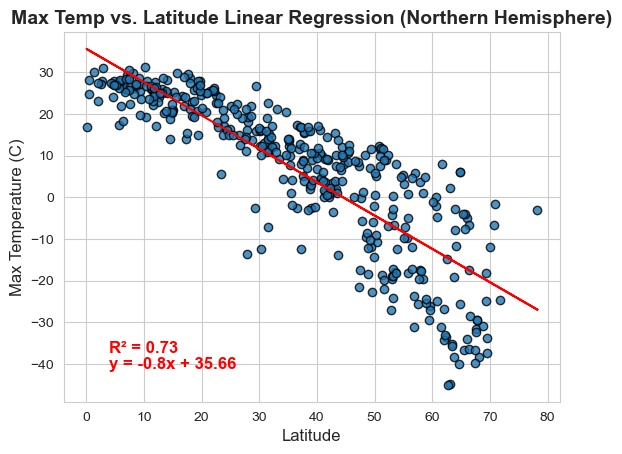

In [67]:
# Linear regression on Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp vs. Latitude Linear Regression (Northern Hemisphere)")

The r-squared value is: 0.2791446522929103
The r value is: 0.5283414164088505


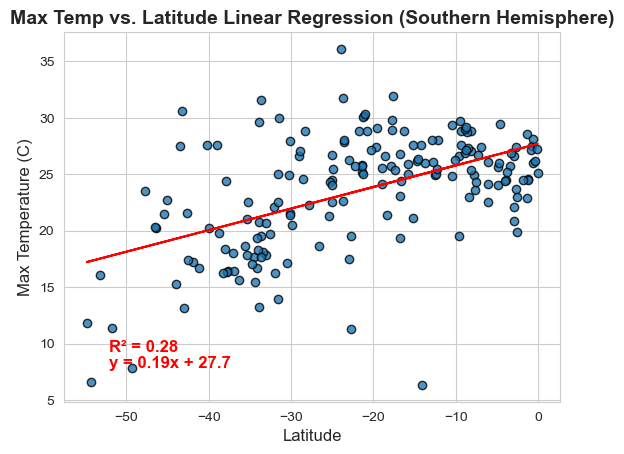

In [77]:
# southern hemisphere max temp vs latitude linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp vs. Latitude Linear Regression (Southern Hemisphere)")

The r-squared value is: 0.09347407419854742
The r value is: 0.3057353008707817


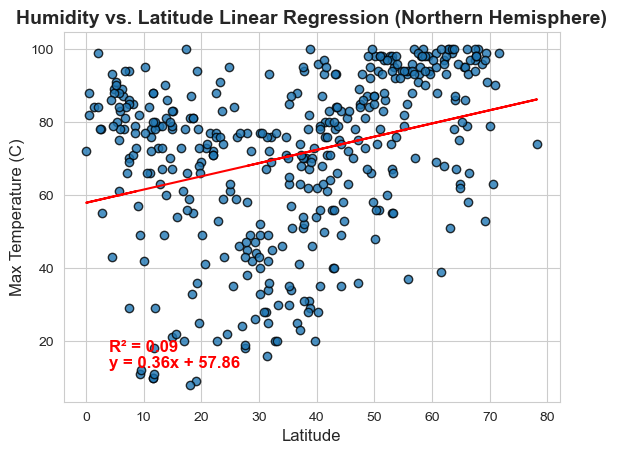

In [78]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity vs. Latitude Linear Regression (Northern Hemisphere)")

The r-squared value is: 0.26808146226132384
The r value is: 0.517765837286822


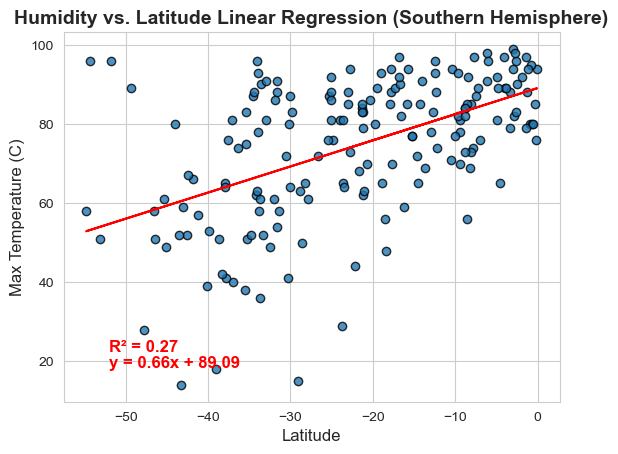

In [79]:
# Southern Hemisphere humidity regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity vs. Latitude Linear Regression (Southern Hemisphere)")

The r-squared value is: 0.033909739092582096
The r value is: 0.18414597224099716


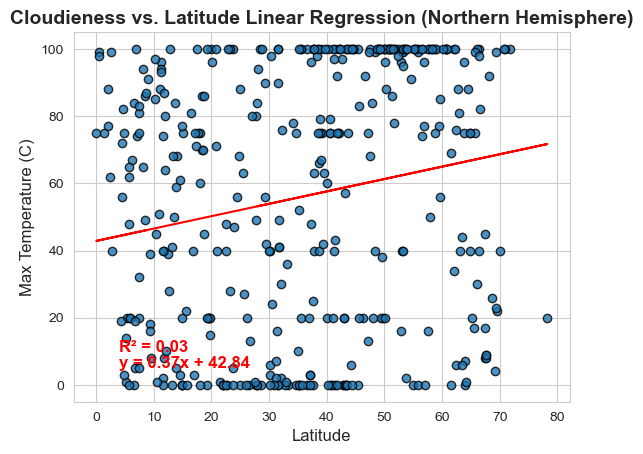

In [80]:
# Northern Hemisphere cloudiness regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudieness vs. Latitude Linear Regression (Northern Hemisphere)")

The r-squared value is: 0.23944729035062348
The r value is: 0.4893335164799398


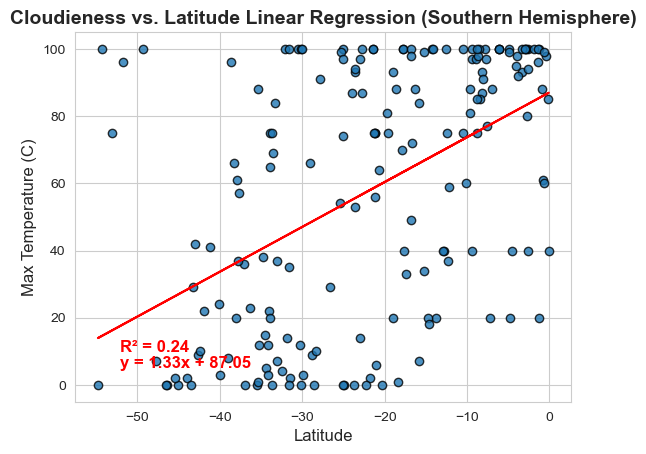

In [81]:
# Southern Hemisphere cloudiness linear regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudieness vs. Latitude Linear Regression (Southern Hemisphere)")

The r-squared value is: 0.001196913975866769
The r value is: -0.034596444555282976


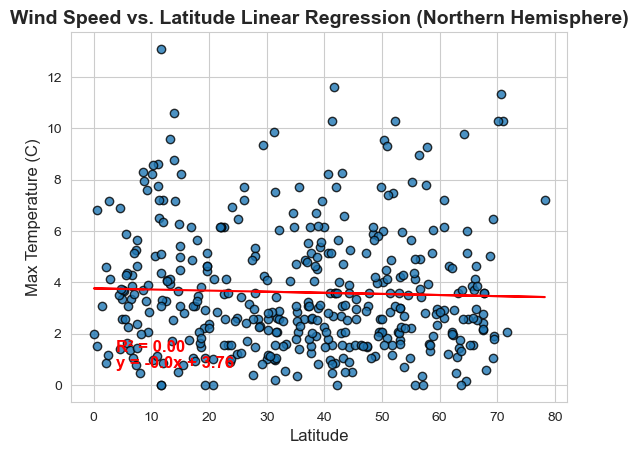

In [82]:
# Northern Hemisphere Wind Speed Linear Regression
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)")

The r-squared value is: 0.05927657673109681
The r value is: -0.24346781456918862


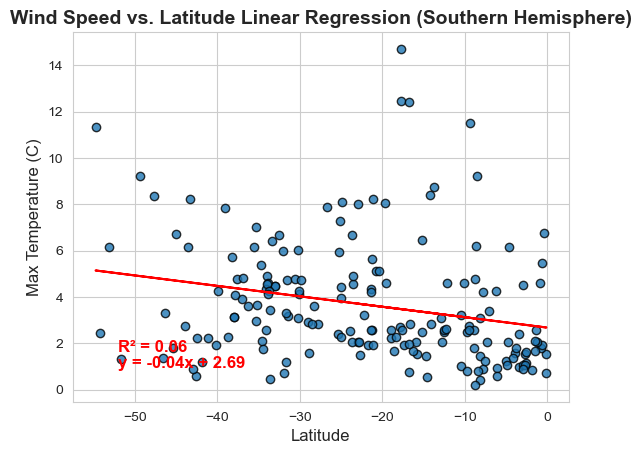

In [83]:
# Southern Hemisphere Wind Speed Linear Regression
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)")